<a href="https://colab.research.google.com/github/pipreaper/colabatory/blob/master/read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# install dependancies
import numpy as np
import pandas as pd
from os import listdir
from os import chdir
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
!ls '/content/gdrive/My Drive/COT_DATA/'

annual_0.txt   annual_14.txt  annual_19.txt  annual_4.txt  annual_9.txt
annual_10.txt  annual_15.txt  annual_1.txt   annual_5.txt  data.csv
annual_11.txt  annual_16.txt  annual_20.txt  annual_6.txt
annual_12.txt  annual_17.txt  annual_2.txt   annual_7.txt
annual_13.txt  annual_18.txt  annual_3.txt   annual_8.txt


In [30]:
# store the data into a data frame
# df = pd.read_csv('/content/gdrive/My Drive/COT_DATA/annual_20.txt')
# change working directory-
chdir('/content/gdrive/My Drive/COT_DATA')
#cwd = os.getcwd()  # Get the current working directory (cwd)
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

# Read all the files into one data frame
filepaths = [f for f in listdir('/content/gdrive/My Drive/COT_DATA/') if f.endswith('.txt')]
df = pd.concat(map(pd.read_csv, filepaths))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,37,38,39,40,41,42,43,44,45,46,126) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df.shape

(155771, 130)

In [32]:
# write data frame to google drive
#df.to_csv('data_all.csv')
#!cp data.csv '/content/gdrive/My Drive/COT_DATA'
#think dont need thisfrom google.colab import files
#files.download("data_all.csv")

In [33]:
data = df[['Market and Exchange Names','As of Date in Form YYMMDD','As of Date in Form YYYY-MM-DD','Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)','Change in Noncommercial-Long (All)','Change in Noncommercial-Short (All)','% of OI-Noncommercial-Long (All)','% of OI-Noncommercial-Short (All)']]
# create a new column 
data['flip'] = data['% of OI-Noncommercial-Long (All)'] - data['% of OI-Noncommercial-Short (All)']
data.head(5)
# sort data by 
data = data.sort_values(['Market and Exchange Names','As of Date in Form YYMMDD'])
data.head(5)

KeyError: ignored

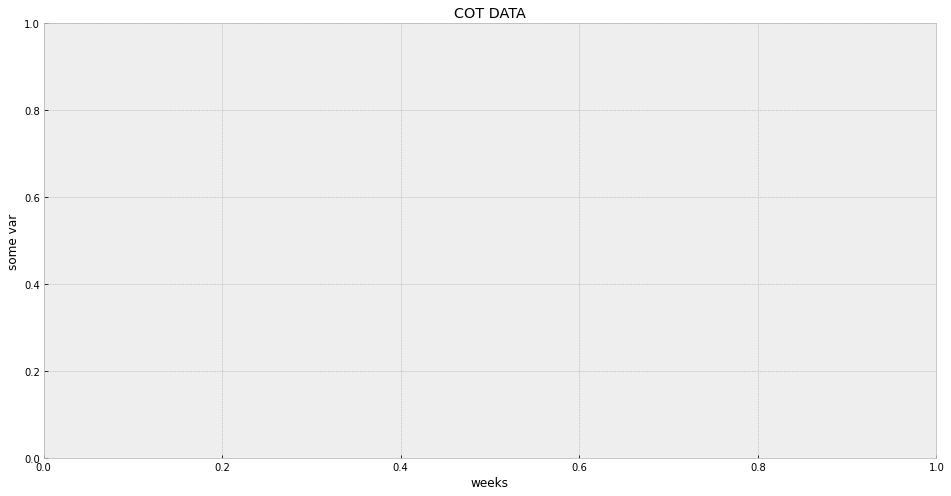

In [36]:
#plt.figure(figsize=(16,8))
#plt.title('COT DATA')
#plt.xlabel('weeks')
#plt.ylabel('some var')
#plt.plot(data['flip'])
#plt.show()